In [1]:
from spatialmath import SE3, SO3
import math
import numpy as np


/home/guisoares/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exercise 3.2

In [2]:
print('\n\nExercise 3.2\n')

rx = SO3.Rx(35, 'deg')
ry = SO3.Ry(135, 'deg')
rz = SO3.Rz(-120, 'deg')

print('Rotation about x-axis by 35 degrees:')
print(rx)
print('Rotation about y-axis by 135 degrees:')
print(ry)
print('Rotation about z-axis by -120 degrees:')
print(rz)

p_before = [1/math.sqrt(3), -1/math.sqrt(6), 1/math.sqrt(2)]
p_after = rz * ry * rx * p_before

print('Position before rotation:')
print(p_before)
print('Position after rotation:')
print(p_after.ravel().tolist())




Exercise 3.2

Rotation about x-axis by 35 degrees:
   1         0         0         
   0         0.8192   -0.5736    
   0         0.5736    0.8192    

Rotation about y-axis by 135 degrees:
  -0.7071    0         0.7071    
   0         1         0         
  -0.7071    0        -0.7071    

Rotation about z-axis by -120 degrees:
  -0.5       0.866     0         
  -0.866    -0.5       0         
   0         0         1         

Position before rotation:
[0.5773502691896258, -0.4082482904638631, 0.7071067811865475]
Position after rotation:
[-0.5587316204140793, 0.5122428644147231, -0.6522470576443076]


## Exercise 3.3

In [3]:
print('\n\nExercise 3.3\n')
# This exercise was solved algebraically we will inspect the results obtained with hands applying the rotation matrix on the three vectors.

# mounting the rotation matrix
line1 = [math.sqrt(2)/2, -1/2, -1/2]
line2 = [math.sqrt(2)/2, 1/2, 1/2]
line3 = [0, -math.sqrt(2)/2, math.sqrt(2)/2]
R = [line1, line2, line3]
R = np.array(R)

# applying the rotation matrix on the three vectors
p1_b = np.array([math.sqrt(2), 0, 2]).T
p1_a = np.dot(R, p1_b)

p2_b = np.array([1, 1, -1]).T
p2_a = np.dot(R, p2_b)

p3_b = np.array([0, 2*math.sqrt(2), 0]).T
p3_a = np.dot(R, p3_b)

p1_b = p1_b.round(2)
p1_a = p1_a.round(2)
p2_b = p2_b.round(2)
p2_a = p2_a.round(2)
p3_b = p3_b.round(2)
p3_a = p3_a.round(2)

# printing the results
print(f"Before: p1_b = {p1_b}, With p1_a = R*p1_b = {p1_a}")
print(f"Before: p2_b = {p2_b}, With p2_a = R*p2_b = {p2_a}")
print(f"Before: p3_b = {p3_b}, With p3_a = R*p3_b = {p3_a}")




Exercise 3.3

Before: p1_b = [1.41 0.   2.  ], With p1_a = R*p1_b = [0.   2.   1.41]
Before: p2_b = [ 1  1 -1], With p2_a = R*p2_b = [ 0.71  0.71 -1.41]
Before: p3_b = [0.   2.83 0.  ], With p3_a = R*p3_b = [-1.41  1.41 -2.  ]


## Exercise 3.16
### Nothing to do here as the exercise was solved algebraically and the results can be tested by analysing the drawings on itam a).

## Exercise 3.17

In [4]:
print('\n\nExercise 3.17\n')

Tad = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [-1, 1, 0, 1]]).T
Tdc = np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, -1, 0], [0, 0, 2, 1]]).T
Tcb = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [-4, 0, 0, 1]]).T

Tab = np.dot(Tad, np.dot(Tdc, Tcb))

print(f"Tab = {Tab}")




Exercise 3.17

Tab = [[ 0  1  0 -1]
 [ 1  0  0 -3]
 [ 0  0 -1  2]
 [ 0  0  0  1]]


## Exercise 3.18

## Exercise 3.21

In [5]:
# import sympy as sym
# theta = sym.symbols('theta')

rz = SE3.Rx(-60, 'deg')
ty = SE3(0, 800, 0)

t_ac = ty * rz
print("t_ac:")
print(t_ac)

t_ab = np.array([[0, -1, 0, -100], [1, 0, 0, 300],
                [0, 0, 1, 500], [0, 0, 0, 1]])
t_ba = np.linalg.inv(t_ab)
print("t_ba:")
print(t_ba)

t_bc = np.dot(t_ba, t_ac)
print("\nt_bc = t_ba * t_ac:")
print(t_bc)


t_ac:
   1         0         0         0         
   0         0.5       0.866     800       
   0        -0.866     0.5       0         
   0         0         0         1         

t_ba:
[[   0.    1.    0. -300.]
 [  -1.   -0.   -0. -100.]
 [   0.    0.    1. -500.]
 [   0.    0.    0.    1.]]

t_bc = t_ba * t_ac:
[[   0.           0.5          0.8660254  500.       ]
 [  -1.           0.           0.        -100.       ]
 [   0.          -0.8660254    0.5       -500.       ]
 [   0.           0.           0.           1.       ]]


## Exercise 3.48



Exercise 3.18



<Axes3DSubplot:xlabel='X', ylabel='Y'>

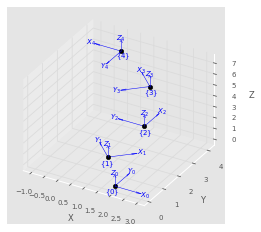

In [21]:
import spatialmath as sm
print('\n\nExercise 3.18\n')


# initial transformation matrix
T_init = [[1, 0, 0, 2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
T_init = np.array(T_init)

# exponetial coordinates
q = np.array([0, 2, 0])
s = np.array([0, 0, 1])
h = 2
theta = math.pi


def screw_to_tr(q, s, h, theta):
    # creating the matrix
    S = [s, -np.cross(s, q) + h*s]
    S = np.array(S)

    w = S[0]
    v = S[1]

    # creating the exponential matrix
    R = np.eye(3) + sm.smb.skew(w) * math.sin(theta) + np.dot(sm.smb.skew(w), sm.smb.skew(w)) * (1 - math.cos(theta))
    
    p = (np.eye(3) * theta + sm.smb.skew(w) * (1 - math.cos(theta)) + np.dot(sm.smb.skew(w), sm.smb.skew(w)) * (theta - math.sin(theta))) @ v
    
    T = np.array([[R[0][0], R[0][1], R[0][2], p[0]], [R[1][0], R[1][1], R[1][2], p[1]], [R[2][0], R[2][1], R[2][2], p[2]], [0, 0, 0, 1]])
    return T
    # final transformation matrix

T_14 = screw_to_tr(q, s, h, theta/4)
T_12 = screw_to_tr(q, s, h, theta/2)
T_34 = screw_to_tr(q, s, h, 3*theta/4)
T_1 = screw_to_tr(q, s, h, theta)

sm.smb.trplot(T_init, frame='0', block=False)
sm.smb.trplot(T_14, frame='1', block=False)
sm.smb.trplot(T_12, frame='2', block=False)
sm.smb.trplot(T_34, frame='3', block=False)
sm.smb.trplot(T_1, frame='4')